In [98]:
import pandas as pd

In [99]:
df = pd.read_csv("golf_dataset_long_format.csv")
df.head(20)

,Temperature,Humidity,Wind,Outlook,Play
0,3.3,49,1,3,1
1,3.3,49,1,3,0
2,3.3,49,1,3,0
3,3.3,49,1,3,1
4,3.3,49,1,3,1
5,3.3,49,1,3,0
6,3.3,49,1,3,0
7,2.9,53,0,3,1
8,2.9,53,0,3,0
9,2.9,53,0,3,1


In [100]:
cols = list(df.columns)
print(cols)

['Temperature', 'Humidity', 'Wind', 'Outlook', 'Play']


In [101]:
df.shape

(7665, 5)

In [102]:
corrmat = df.corr()
top_corr_features = corrmat.index
corrmat

,Temperature,Humidity,Wind,Outlook,Play
Temperature,1.000000,0.683181,-0.162446,-0.113775,-0.021652
Humidity,0.683181,1.000000,-0.115711,-0.139317,-0.096551
Wind,-0.162446,-0.115711,1.000000,-0.028279,-0.054290
Outlook,-0.113775,-0.139317,-0.028279,1.000000,0.068390
Play,-0.021652,-0.096551,-0.054290,0.068390,1.000000


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

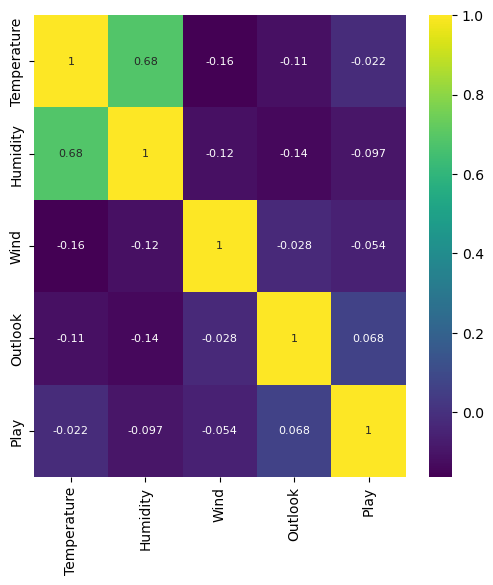

In [104]:
plt.figure(figsize=(6,6))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis", annot_kws={"fontsize":8})

In [105]:
feature_cols= df.columns.drop(['Play'])
print(feature_cols)

Index(['Temperature', 'Humidity', 'Wind', 'Outlook'], dtype='object')


In [106]:
feature_cols= ['Temperature','Humidity','Wind','Outlook']
print(feature_cols)

['Temperature', 'Humidity', 'Wind', 'Outlook']


In [107]:
X = df[feature_cols]
X.head()

,Temperature,Humidity,Wind,Outlook
0,3.3,49,1,3
1,3.3,49,1,3
2,3.3,49,1,3
3,3.3,49,1,3
4,3.3,49,1,3


In [108]:
y = df.Play
y.head()

0    1
1    0
2    0
3    1
4    1
Name: Play, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 20)

In [111]:
len(y_train)

4215

In [112]:
len(y_test)

3450

In [113]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=4)

In [114]:
model= clf.fit(X_train, y_train)

In [115]:
y_pred = model.predict(X_test)

In [116]:
len(y_pred)

3450

In [117]:
len(y_test)

3450

In [118]:
y = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
y.head()

,Actual,Predicted
1940,0,0
1952,0,0
4755,0,0
5767,0,0
231,0,0


In [119]:
y.tail()

,Actual,Predicted
1157,0,0
4626,0,0
632,0,0
1358,0,0
153,0,0


In [120]:
y.sample(10)

,Actual,Predicted
4549,0,0
2779,0,0
537,0,0
4712,1,0
25,0,0
3291,1,0
5473,0,0
4361,0,0
5066,0,0
2761,0,0


In [121]:
from sklearn import metrics

In [122]:
c_mtrx = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(c_mtrx)

Confusion Matrix
[[2832    8]
 [ 610    0]]


Text(0.5, 1.0, 'Confusion Matrix')

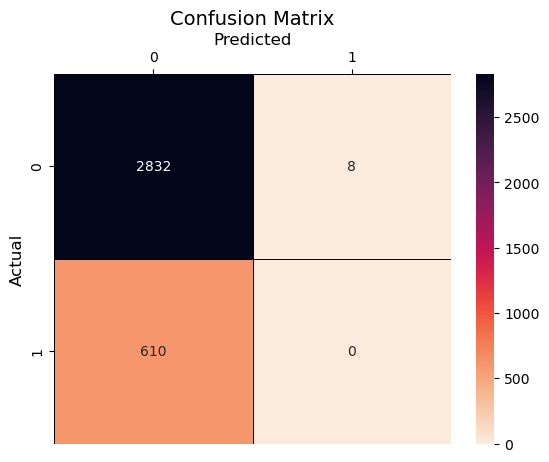

In [123]:
# Create the heatmap
ax = sns.heatmap(c_mtrx, annot=True, fmt='d', cbar=True, cmap="rocket_r", linewidths=.5, linecolor='black')
# fmt='d' for integer format, using a colormap similar to the image

# Set predicted labels on top
ax.xaxis.tick_top() # Move the x-axis ticks (Predicted labels) to the top
ax.xaxis.set_label_position('top') # Move the x-axis label ('Predicted') to the top

# Set the axis labels and title
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

In [124]:
#[row, column]
#(Actual, Predict)
TN = c_mtrx[0, 0]
FP = c_mtrx[0, 1]
FN = c_mtrx[1, 0]
TP = c_mtrx[1, 1]

print("TN: ", TN, "\tFP: ", FP)
print("FN: ", FN, "\tTP: ", TP)

TN:  2832 	FP:  8
FN:  610 	TP:  0


In [125]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix
Accuracy:	 0.8208695652173913
Sensitivity:	 0.0
Specificity:	 0.9971830985915493
Precision:	 0.0
Classification Eerror: 0.1791304347826087
False_Positive_Rate: 0.0028169014084507005


In [126]:
count0 = df['Play'][df.Play == 0].count()

count1 = df['Play'][df.Play == 1].count()

print("Actual Dataset")
print("0's:",count0)
print("1's:",count1)

Actual Dataset
0's: 6266
1's: 1399


In [87]:
Trcount0 = sum(y_train==0)
Trcount1 = sum(y_train==1)

print("Trained Dataset")
print("0's:",Trcount0)
print("1's:",Trcount1)

Trained Dataset
0's: 4701
1's: 1047


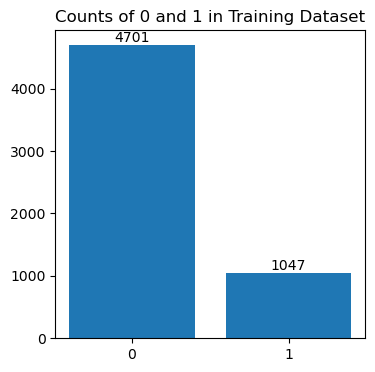

In [88]:
# Plotting the bar chart
labels = ['0', '1']
counts = [Trcount0, Trcount1]
plt.figure(figsize=(4,4))
plt.title('Counts of 0 and 1 in Training Dataset')
plt.bar(labels, counts)
# Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
   
plt.show()

In [89]:
from sklearn import tree

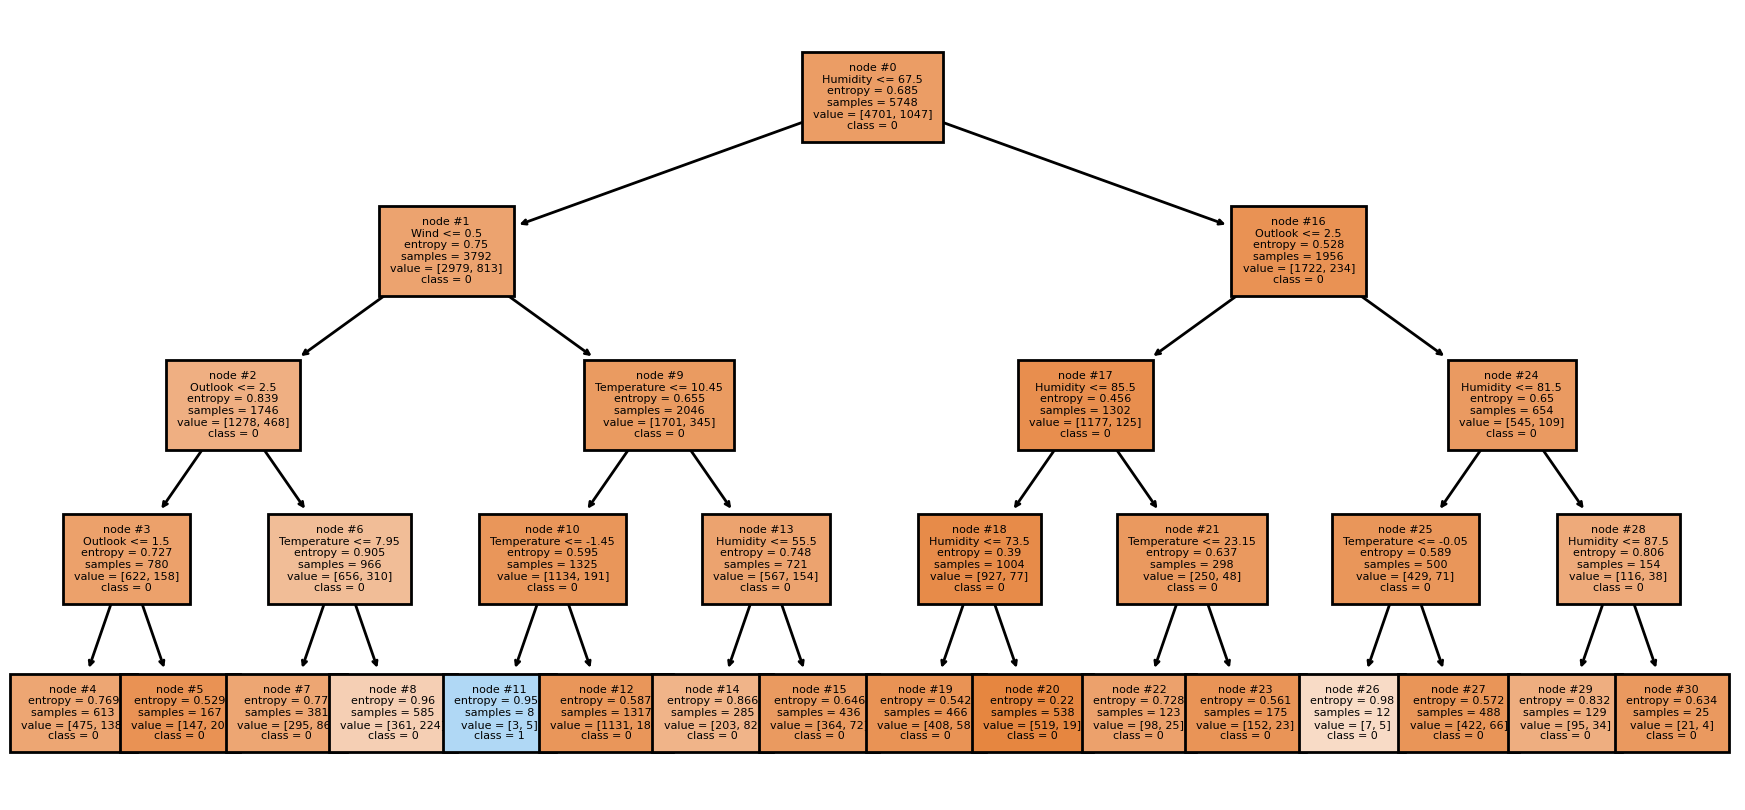

In [90]:
# Plot the decision tree with customizations
plt.figure(figsize=(11, 5), dpi=200)
# plt.title("Decision Tree Visualization")
tree.plot_tree(clf, filled=True, feature_names=list(X_train.columns), class_names=["0","1"],
                                   fontsize=4, max_depth=4, node_ids=True)

plt.show()

In [91]:
text_representation = tree.export_text(clf, feature_names=list(X_train.columns))
print(text_representation)

|--- Humidity <= 67.50
|   |--- Wind <= 0.50
|   |   |--- Outlook <= 2.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Outlook >  2.50
|   |   |   |--- Temperature <= 7.95
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  7.95
|   |   |   |   |--- class: 0
|   |--- Wind >  0.50
|   |   |--- Temperature <= 10.45
|   |   |   |--- Temperature <= -1.45
|   |   |   |   |--- class: 1
|   |   |   |--- Temperature >  -1.45
|   |   |   |   |--- class: 0
|   |   |--- Temperature >  10.45
|   |   |   |--- Humidity <= 55.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  55.50
|   |   |   |   |--- class: 0
|--- Humidity >  67.50
|   |--- Outlook <= 2.50
|   |   |--- Humidity <= 85.50
|   |   |   |--- Humidity <= 73.50
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity >  73.50
|   |   |   |   |--- class: 0
|   |   |--- Humidity >  85.50
|   |   |   |--- Temperature <= 23.15
|  